<a href="https://colab.research.google.com/github/Hemanthnk04/EDUNET-Internship-Sentiment-Analysis-of-Restaurant-Reviews/blob/main/sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentimental Analysis of Restaurant Reviews**
.This Notebook deals with "Sentiment Analysis of Restaurant Reviews"using dfferent Algorithms

# **About the Data**
.Data Overviwew:This is a'Sentimental Anlaysis of Restaurant REviews'.tsv Data

# **Import Required Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

# **Exploratory data Analysis**

Load and prepare Data

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Restaurant_Reviews.tsv",delimiter='\t',quoting=3)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.shape

(1000, 2)

In [ ]:
data.columns

Index(['Review', 'Liked'], dtype='object')

In [ ]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [ ]:
data.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [ ]:
data.describe(include='object')

,Review
count,1000
unique,996
top,I would not recommend this place.
freq,2


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Liked,1000.0,0.5,0.50025,0.0,0.0,0.5,1.0,1.0


In [ ]:
data['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [ ]:
data['length']=data['Review'].apply(len)
data.head()

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


# Data preprocessing


In [ ]:
import nltk
import re
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import string
from nltk.corpus import stopwords

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [ ]:
def text_process(msg):
  nopunc=[char for char in msg if char not in string.punctuation]
  nopunc=''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
data['tokinized_review']=data['Review'].apply(text_process)

In [ ]:
data.head()

,Review,Liked,length,tokinized_review
0,Wow... Loved this place.,1,24,Wow Loved place
1,Crust is not good.,0,18,Crust good
2,Not tasty and the texture was just nasty.,0,41,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,87,Stopped late May bank holiday Rick Steve recom...
4,The selection on the menu was great and so wer...,1,59,selection menu great prices


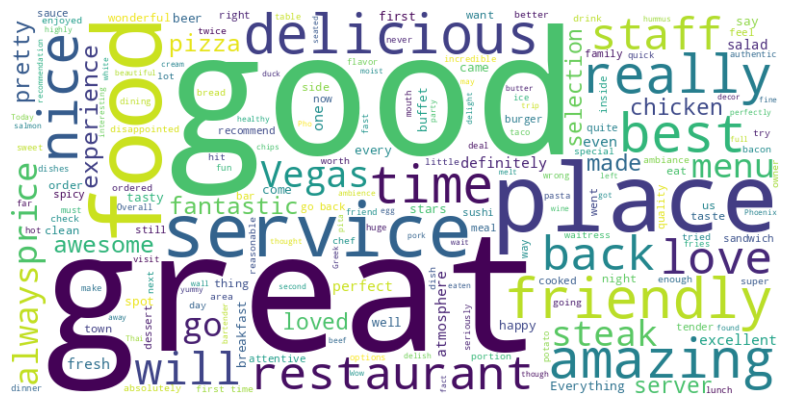

In [ ]:
#import library
#positive review
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud=data.loc[data['Liked']==1,:]
text=' '.join([text for text in word_cloud['Review']])
#generate a wordcloud object
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)
#display the wordclod using matplotlib
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_df=0.9,min_df=10)
x=cv.fit_transform(data['tokinized_review']).toarray()


In [ ]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# **Split Data-(1000,1500)**

.in this step we are going to split data into two parts(training,testing) so that we can train our model on training dataset and test its acuuracy on its unseen test data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data['tokinized_review'],data['Liked'],random_state=107,test_size=0.2)

In [ ]:
x_train.head()

675                        fantastic neighborhood gem
561                               two felt disgusting
535    excellent new restaurant experienced Frenchman
266                                service par either
199                                       worth drive
Name: tokinized_review, dtype: object

In [ ]:
train_v=cv.transform(x_train)
test_v=cv.transform(x_test)

In [ ]:
x_train_a=train_v.toarray()
x_test_a=test_v.toarray()

# **TakeAway points**
.usually we take more and more data in training so it's ofr a model to learn with more data

# **Model Training**

.As we have done with preprocessing ,it is time to train our model


---



In [ ]:
from sklearn.naive_bayes import BernoulliNB
ber=BernoulliNB(alpha=0.3)


In [ ]:
ber.fit(x_train_a,y_train)
y_pred=ber.predict(x_test_a)
y_pred_t=ber.predict(x_train_a)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
from sklearn.svm import SVC
clf1 = SVC(kernel='linear', C=1.0)  # Linear kernel is one option; you can also use 'rbf' or 'poly'
clf1.fit(x_train_a,y_train)
y_pred2=clf1.predict(x_test_a)
y_pred_t2=clf1.predict(x_train_a)

In [ ]:
y_test

906    0
24     1
706    1
958    0
355    1
      ..
657    1
754    0
839    1
495    0
804    1
Name: Liked, Length: 200, dtype: int64

# **FOR Randomforest**

In [ ]:
from sklearn.model_selection import  RandomizedSearchCV

In [ ]:

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

clf = RandomForestClassifier(n_estimators=1000, random_state=42)
random_search = RandomizedSearchCV(
    clf, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42, n_jobs=-1, verbose=1
)

# Perform random search for hyperparameter tuning
random_search.fit(x_train_a, y_train)

# Best hyperparameters
best_clf = random_search.best_estimator_

# Best hyperparameters
best_clf = random_search.best_estimator_

# Train the model
best_clf.fit(x_train_a, y_train)

# Predictions
y_pred1 = best_clf.predict(x_test_a)
y_pred_t1=best_clf.predict(x_train_a)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report


In [ ]:
def print_metrics(actual,predicted):
  score1=accuracy_score(actual,predicted)
  score2=precision_score(actual,predicted)
  score3=recall_score(actual,predicted)


  print("----scores----")
  print("accuracy score is:{}%".format(round(score1*100,2)))
  print("precision score is:{}%".format(round(score2*100,2)))
  print("recall score is:{}%".format(round(score3*100,2)))
  print("f1_score is:{}%".format((f1_score(actual,predicted))))
  print("roc_auc_score is:{}%".format((roc_auc_score(actual,predicted))))
  print("classification_report is:{}%".format((classification_report(actual,predicted))))


In [ ]:
print_metrics(y_test,y_pred)

----scores----
accuracy score is:76.0%
precision score is:79.35%
recall score is:71.57%
f1_score is:0.7525773195876289%
roc_auc_score is:0.760904361744698%
classification_report is:              precision    recall  f1-score   support

           0       0.73      0.81      0.77        98
           1       0.79      0.72      0.75       102

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200
%


In [ ]:
print_metrics(y_train,y_pred_t)

----scores----
accuracy score is:77.25%
precision score is:82.53%
recall score is:68.84%
f1_score is:0.7506849315068493%
roc_auc_score is:0.7720818020450511%
classification_report is:              precision    recall  f1-score   support

           0       0.74      0.86      0.79       402
           1       0.83      0.69      0.75       398

    accuracy                           0.77       800
   macro avg       0.78      0.77      0.77       800
weighted avg       0.78      0.77      0.77       800
%


In [ ]:
print_metrics(y_test,y_pred1)

----scores----
accuracy score is:75.5%
precision score is:83.54%
recall score is:64.71%
f1_score is:0.7292817679558012%
roc_auc_score is:0.7572028811524609%
classification_report is:              precision    recall  f1-score   support

           0       0.70      0.87      0.78        98
           1       0.84      0.65      0.73       102

    accuracy                           0.76       200
   macro avg       0.77      0.76      0.75       200
weighted avg       0.77      0.76      0.75       200
%


In [ ]:
print_metrics(y_train,y_pred_t1)

----scores----
accuracy score is:83.62%
precision score is:94.65%
recall score is:71.11%
f1_score is:0.8120516499282641%
roc_auc_score is:0.835627140678517%
classification_report is:              precision    recall  f1-score   support

           0       0.77      0.96      0.85       402
           1       0.95      0.71      0.81       398

    accuracy                           0.84       800
   macro avg       0.86      0.84      0.83       800
weighted avg       0.86      0.84      0.83       800
%


In [ ]:
print_metrics(y_test,y_pred2)

----scores----
accuracy score is:73.5%
precision score is:81.82%
recall score is:61.76%
f1_score is:0.7039106145251396%
roc_auc_score is:0.7373949579831933%
classification_report is:              precision    recall  f1-score   support

           0       0.68      0.86      0.76        98
           1       0.82      0.62      0.70       102

    accuracy                           0.73       200
   macro avg       0.75      0.74      0.73       200
weighted avg       0.75      0.73      0.73       200
%


In [ ]:
print_metrics(y_train,y_pred_t2)

----scores----
accuracy score is:77.88%
precision score is:88.5%
recall score is:63.82%
f1_score is:0.7416058394160583%
roc_auc_score is:0.7780507012675316%
classification_report is:              precision    recall  f1-score   support

           0       0.72      0.92      0.81       402
           1       0.89      0.64      0.74       398

    accuracy                           0.78       800
   macro avg       0.80      0.78      0.77       800
weighted avg       0.80      0.78      0.77       800
%


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm1=confusion_matrix(y_test,y_pred1)
cm2=confusion_matrix(y_test,y_pred2)

In [ ]:
cm

array([[79, 19],
       [29, 73]])

In [ ]:
cm1

array([[85, 13],
       [36, 66]])

In [ ]:
cm2

array([[84, 14],
       [39, 63]])

Text(95.72222222222221, 0.5, 'Actual values')

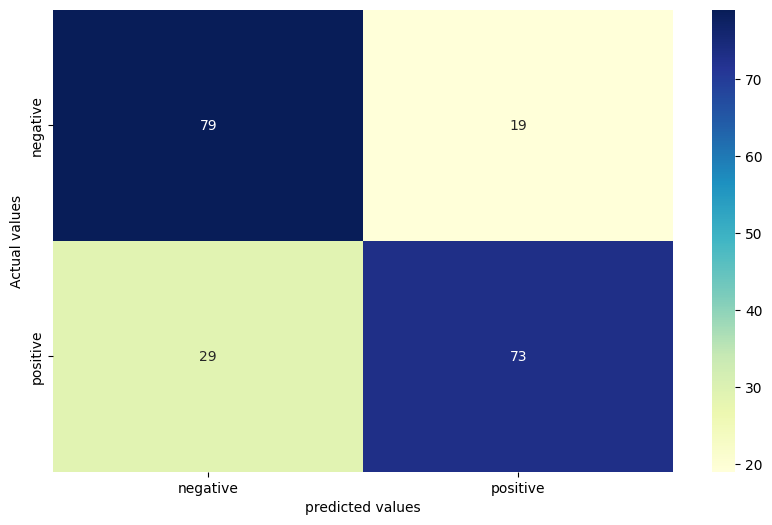

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap="YlGnBu",xticklabels=['negative','positive'],yticklabels=['negative','positive'])
plt.xlabel("predicted values")
plt.ylabel("Actual values")


Text(95.72222222222221, 0.5, 'Actual values')

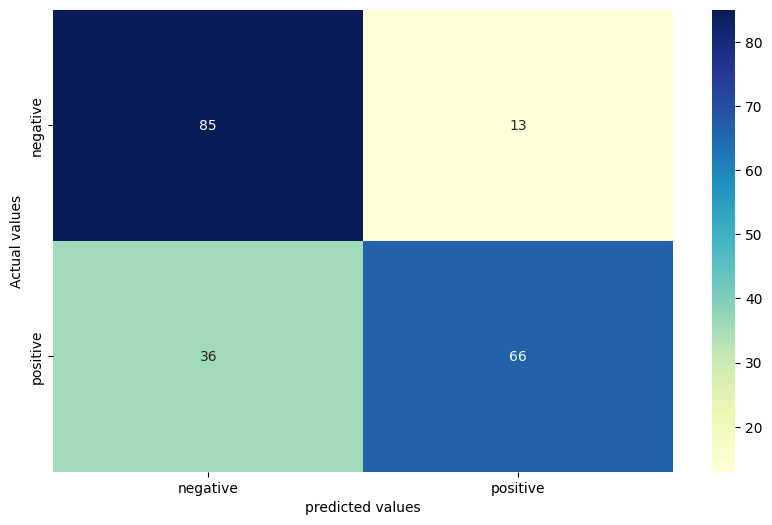

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,6))
sns.heatmap(cm1,annot=True,cmap="YlGnBu",xticklabels=['negative','positive'],yticklabels=['negative','positive'])
plt.xlabel("predicted values")
plt.ylabel("Actual values")


Text(95.72222222222221, 0.5, 'Actual values')

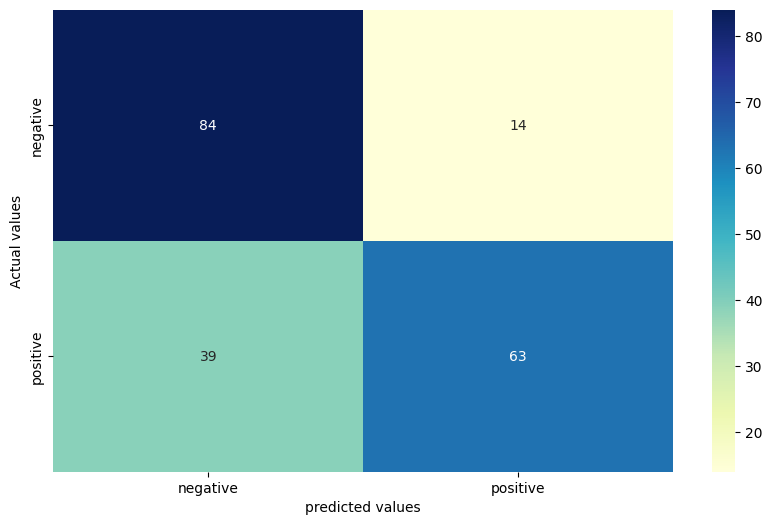

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,6))
sns.heatmap(cm2,annot=True,cmap="YlGnBu",xticklabels=['negative','positive'],yticklabels=['negative','positive'])
plt.xlabel("predicted values")
plt.ylabel("Actual values")


# **Hyper parameter tuning for RANDOMFORESTCLASSIFIER**

In [ ]:
  best_accuracy=0.0
  alpha_val=0.0
  for i in np.arange(0.1,1.1,0.1):
    temp_classifier=RandomForestClassifier()
    temp_classifier.fit(x_train_a,y_train)
    temp_y_pred=temp_classifier.predict(x_test_a)
    score=accuracy_score(y_test,temp_y_pred)
    print("Accuracy score for alpha={} is:{}%".format(round(i,1),round(score*100,2)))
    if score>best_accuracy:
      best_accuracy=score
      alpha_value=i
  print('-------------------------------------------------------------------------')
  print('the best accuracy is{}% and alpha value as {}'.format(round(best_accuracy*100,2),round(alpha_val,1)))


Accuracy score for alpha=0.1 is:73.5%
Accuracy score for alpha=0.2 is:73.0%
Accuracy score for alpha=0.3 is:74.5%
Accuracy score for alpha=0.4 is:74.0%
Accuracy score for alpha=0.5 is:74.0%
Accuracy score for alpha=0.6 is:74.5%
Accuracy score for alpha=0.7 is:73.5%
Accuracy score for alpha=0.8 is:73.5%
Accuracy score for alpha=0.9 is:74.5%
Accuracy score for alpha=1.0 is:73.0%
-------------------------------------------------------------------------
the best accuracy is74.5% and alpha value as 0.0


# **Hyper parameter tuning for SVC**

In [ ]:
  best_accuracy=0.0
  alpha_val=0.0
  for i in np.arange(0.1,1.1,0.1):
    temp_classifier=SVC()
    temp_classifier.fit(x_train_a,y_train)
    temp_y_pred=temp_classifier.predict(x_test_a)
    score=accuracy_score(y_test,temp_y_pred)
    print("Accuracy score for alpha={} is:{}%".format(round(i,1),round(score*100,2)))
    if score>best_accuracy:
      best_accuracy=score
      alpha_value=i
  print('-------------------------------------------------------------------------')
  print('the best accuracy is{}% and alpha value as {}'.format(round(best_accuracy*100,2),round(alpha_val,1)))


Accuracy score for alpha=0.1 is:74.5%
Accuracy score for alpha=0.2 is:74.5%
Accuracy score for alpha=0.3 is:74.5%
Accuracy score for alpha=0.4 is:74.5%
Accuracy score for alpha=0.5 is:74.5%
Accuracy score for alpha=0.6 is:74.5%
Accuracy score for alpha=0.7 is:74.5%
Accuracy score for alpha=0.8 is:74.5%
Accuracy score for alpha=0.9 is:74.5%
Accuracy score for alpha=1.0 is:74.5%
-------------------------------------------------------------------------
the best accuracy is74.5% and alpha value as 0.0


# **Hyper parameter tuning for Bernoulli**


In [ ]:
#hyper parameter tuning
best_accuracy=0.0
alpha_val=0
for i in np.arange(0.01,1.1,0.1):
  temp_cls=BernoulliNB(alpha=i)
  temp_cls.fit(x_train_a, y_train)
  y_test_pred_h_nbayas=temp_cls.predict(x_test_a)
  score=accuracy_score(y_test, y_test_pred_h_nbayas)
  print("accuracy score for alpha {} is {}%".format(round(i,1),round(score*100,2)))
  if score>best_accuracy:
    best_accuracy=score
    alpha_val=i
print("...............................................................")
print("the best accuracy is {}% with alpha value as {}".format(round(best_accuracy*100,2),round(alpha_val,1)))

accuracy score for alpha 0.0 is 75.5%
accuracy score for alpha 0.1 is 75.5%
accuracy score for alpha 0.2 is 75.5%
accuracy score for alpha 0.3 is 76.0%
accuracy score for alpha 0.4 is 76.0%
accuracy score for alpha 0.5 is 76.0%
accuracy score for alpha 0.6 is 76.0%
accuracy score for alpha 0.7 is 75.5%
accuracy score for alpha 0.8 is 75.5%
accuracy score for alpha 0.9 is 75.5%
accuracy score for alpha 1.0 is 75.5%
...............................................................
the best accuracy is 76.0% with alpha value as 0.3
